<a href="https://colab.research.google.com/github/David-Giraldo/Analitica_de_datos_/blob/main/Modulo1/Anal%C3%ADtica_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo básico aprendizaje estadístico

## Regresión por mínimos cuadrados sobre ruido blanco Gaussiano

$$ x=x^*+ \eta $$

$$ \eta \sim \mathcal{N}(\eta | \mu_\eta, \sigma_\eta )$$

$$ \mathcal{N}(\eta | \mu_\eta, \sigma_\eta ) = \frac{1}{\sqrt{2\pi\sigma^2_\eta}}\exp\left(\frac{-\|\eta-\mu_\eta\|^2}{2\sigma^2_\eta}\right)$$

# Desde análisis de datos:

$$y=f(x)+\eta$$
$$y-f(x)=\eta \sim \mathcal{N}(\eta | \mu_\eta, \sigma_\eta )$$
$$y-f(x)=\eta \sim \mathcal{N}(y-f(x) | \mu_\eta, \sigma_\eta )$$
$$= \frac{1}{\sqrt{2\pi\sigma^2_\eta}}\exp\left(\frac{-\|(y-f(x))-\mu_\eta\|^2}{2\sigma^2_\eta}\right)$$

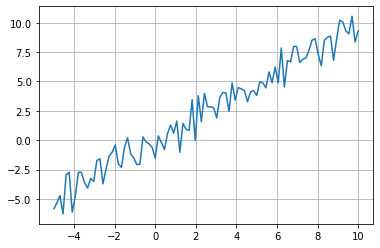

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xi=-5
xf=10
N=100  #instancias
x=np.linspace(xi,xf,N)
x=x.reshape(-1,1)
x.shape
eta=np.random.randn(N).reshape(-1,1)
eta.shape
y=x+eta

plt.plot(x,y)
plt.grid(True)
plt.show()

# Ejercicio 1 (Solución propuesta)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xi=-5
xf=10
N=100  #instancias
z=np.linspace(xi,xf,N)
z=z.reshape(-1,1) #vector de valores x
yi=np.linspace(xi,xf,N)
yi=yi.reshape(-1,1) #vector de valores y
vector_unos=np.ones(N).reshape(-1,1) #vector de unos
eta=np.random.randn(N).reshape(-1,1) #vector ruido
y=yi-eta
x=np.hstack([z, vector_unos]) #Matriz (Nx2) entre vector de valores y vector de unos
x_plus= np.linalg.pinv(x) #Pseudoinversa de la matriz x
w_plus=x_plus.dot(y).reshape(-1,1) #valores de m y b
w_plus

array([[ 1.04080347],
       [-0.07430135]])

In [ ]:
np.polyfit(x[:, 0], y, 1)

array([[ 1.04080347],
       [-0.07430135]])

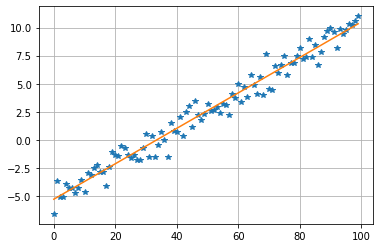

In [ ]:
yf=x.dot(w_plus).reshape(-1,1)
plt.plot(y, '*')
plt.plot(yf)
plt.grid(True)
plt.show()

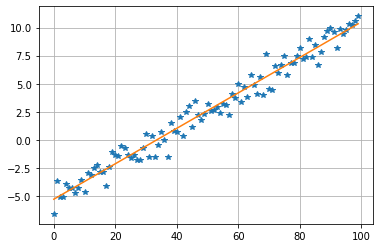

In [ ]:
yf=x.dot(w_plus).reshape(-1,1)
#plt.plot(x[:, 0], y, '*')
#plt.plot(x,y)
plt.plot(y, '*')
plt.plot(yf)
#plt.xlim(0, 15)
#plt.ylim(0, 15)
plt.grid(True)
plt.show()

# Ejercicio 1 (Solución de clase)

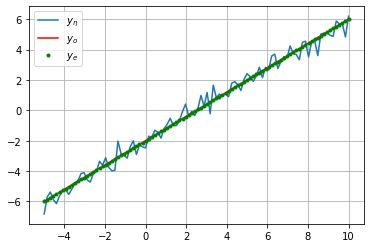

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xi=-5
xf=10
N=100  #instancias
var=0.2
m=0.8
b=-2
x=np.linspace(xi,xf,N)
x=x.reshape(-1,1)
eta=np.sqrt(var)*np.random.randn(N).reshape(-1,1)

X=np.c_[np.linspace(xi,xf,N).reshape(-1,1),np.ones((N,1))] #np.c concatena por columnas 2 vectores
w=np.array([m,b]).reshape(-1,1) #parametros del modelo lineal m y b como vector columna 2x1
y=X.dot(w) + eta
yo=X.dot(w)
we= np.linalg.pinv(X).dot(y).reshape(-1,1) #Pseudoinversa de la matriz x
ye=X.dot(we)

plt.plot(X[:,0],y, label='$y_{\eta}$')
plt.plot(X[:,0], yo,'r', label='$y_{o}$')
plt.plot(X[:,0], yo,'g.', label='$y_{e}$')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
we= np.linalg.pinv(X).dot(y).reshape(-1,1) #Pseudoinversa de la matriz x
we

array([[ 0.81017194],
       [-2.03743422]])

# Sklearn & Panda

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg= LinearRegression() #llamo ini, constructor del objeto sklearn Linear Regression
reg.fit(X,y) #ajustar, entrenar el modelo -> pinv(X).dot(y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(reg.coef_, reg.intercept_)

[[0.80154155 0.        ]] [-1.97483475]


In [ ]:
ye=reg.predict(X) #Predecir valores nuevos, X.dot(we)
yen=reg.predict(X[2].reshape(1,-1))
yen

array([[-5.73965113]])

In [ ]:
print(mean_squared_error(yo,ye))

0.0008875671895582202
